# Final Project, by Hunter Redman

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
#displaying the top 10 games
data_dis = pd.read_excel(r"C:\Users\hunte\Documents\Python\data\finaldata.xlsx")
data_dis.head(10)

,game,fps,pcount
0,pubg,83,3257248
1,cs go,277,1308963
2,dota 2,100,1295114
3,cyberpunk 2077,40,1054388
4,new world,42,913634
5,valheim,50,502387
6,terrarria,60,489886
7,capcom arcade staduim,60,488791
8,fallout 4,70,472962
9,life is strange 2,45,468717


In [8]:
# importing data 
data = pd.read_excel(r"C:\Users\hunte\Documents\Python\data\finaldata4.xlsx")
data.head(10)

,fps,pcount
0,83,3257248
1,277,1308963
2,100,1295114
3,40,1054388
4,42,913634
5,50,502387
6,60,489886
7,60,488791
8,70,472962
9,45,468717


In [9]:
# check for null values
data.isnull == True

False

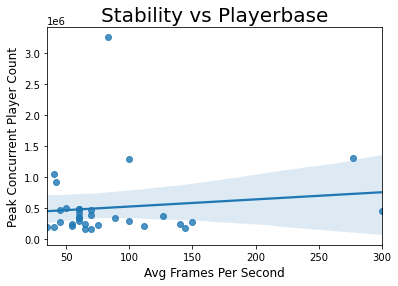

             fps    pcount
fps     1.000000  0.121008
pcount  0.121008  1.000000


In [10]:
# display correlation
sns.regplot(x= data['fps'], y= data['pcount'])
plt.title('Stability vs Playerbase',size=20)
plt.ylabel('Peak Concurrent Player Count', size=12)
plt.xlabel('Avg Frames Per Second', size=12)
plt.show()
print(data.corr())

In [11]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [12]:
# creating the regression
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [13]:
# using regression to predict values
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'FPS': [i[0] for i in val_X], 'Predicted Playercount': [k for k in pred_y]})
prediction

,FPS,Predicted Playercount
0,60,4.884695e+05
1,140,6.697216e+05
2,300,1.032226e+06
3,100,5.790955e+05
4,89,5.541734e+05
5,60,4.884695e+05
6,35,4.318282e+05
7,112,6.062833e+05


In [14]:
# predicted amount of extra players from an increase in frames per second
regression.coef_

array([2265.65110581])

In [23]:
# y intercept
frames = [0]
answer = regression.predict([frames])
print("Score = {}".format(round(answer[0],3)))

Score = 352530.404


In [15]:
# comparing the prediction with the real values
compare_scores = pd.DataFrame({'Actual Playercount': val_y, 'Predicted Playercount': pred_y})
compare_scores

,Actual Playercount,Predicted Playercount
0,412063,4.884695e+05
1,247709,6.697216e+05
2,447476,1.032226e+06
3,1295114,5.790955e+05
4,330879,5.541734e+05
5,361001,4.884695e+05
6,189589,4.318282e+05
7,201053,6.062833e+05


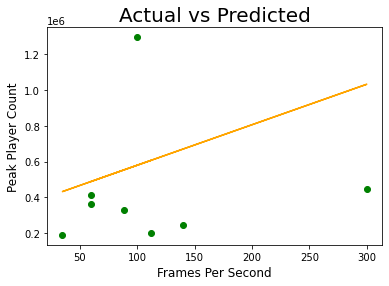

In [16]:
# displaying actual vs predicted grades
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='orange')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Peak Player Count', size=12)
plt.xlabel('Frames Per Second', size=12)
plt.show()

In [25]:
# Calculating the accuracy of the model
print('Mean absolute percentage error: ',mean_absolute_percentage_error(val_y,pred_y))

Mean absolute percentage error:  1.0087397117393369


In [19]:
# 30 frames per second has been the console standard for many years
# predicted amount of players for a game that runs at 30 fps:
frames = [30]
answer = regression.predict([frames])
print("Score = {}".format(round(answer[0],3)))

Score = 420499.937


In [20]:
# 60 frames per second is the new industry standard for consoles and scenic games
frames = [60]
answer = regression.predict([frames])
print("Score = {}".format(round(answer[0],3)))

Score = 488469.47


In [21]:
# 144 frames per second is considered standard for most esports titles
frames = [144]
answer = regression.predict([frames])
print("Score = {}".format(round(answer[0],3)))

Score = 678784.163
